In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datasets import load_dataset
import scipy 
import ast
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/Cornelius/Desktop/load_Analysis_And Prediction/Loan.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [3]:
	#Demographics Summary:
df.copy().groupby('Age')[['AnnualIncome','MonthlyLoanPayment']].agg(["mean",'median',"sum"])

AnnualIncome                    MonthlyLoanPayment              \
             mean   median       sum               mean      median   
Age                                                                   
18   49238.184309  40097.0  39538262         950.650827  748.548629   
19   52472.978873  42658.0   7451163         983.083738  791.339689   
20   47899.850000  39107.0   6705979        1018.634263  783.769808   
21   51530.511013  43402.0  11697426         892.561667  758.657448   
22   48642.087719  38844.0  11090396         941.412336  753.168399   
..            ...      ...       ...                ...         ...   
76   73287.000000  67800.5    293148         899.754437  903.924666   
77   48924.600000  38109.0    489246         850.727914  709.043170   
78   40933.000000  43612.0    122799         667.998209  706.785538   
79   89707.666667  60888.0    269123         575.655250  555.250523   
80   64548.625000  49833.5    516389         939.356261  722.379161   

                    
               sum  
Age                 
18   763372.613750  
19   139597.890737  
20   142608.796846  
21   202611.498414  
22   214642.012655  
..             ...  
76     3599.017749  
77     8507.279141  
78     2003.994626  
79     1726.965750  
80     7514.850084  

[63 rows x 6 columns]

In [4]:
#Employment and education breakdown.

df.copy().pivot_table(columns='EmploymentStatus',index='EducationLevel',aggfunc='count')

Age                          AnnualIncome                \
EmploymentStatus Employed Self-Employed Unemployed     Employed Self-Employed   
EducationLevel                                                                  
Associate            3500           262        272         3500           262   
Bachelor             5045           575        434         5045           575   
Doctorate             750           111         93          750           111   
High School          5283           315        310         5283           315   
Master               2458           310        282         2458           310   

                            ApplicationDate                           \
EmploymentStatus Unemployed        Employed Self-Employed Unemployed   
EducationLevel                                                         
Associate               272            3500           262        272   
Bachelor                434            5045           575        434   
Doctorate                93             750           111         93   
High School             310            5283           315        310   
Master                  282            2458           310        282   

                 BankruptcyHistory  ... TotalAssets TotalDebtToIncomeRatio  \
EmploymentStatus          Employed  ...  Unemployed               Employed   
EducationLevel                      ...                                      
Associate                     3500  ...         272                   3500   
Bachelor                      5045  ...         434                   5045   
Doctorate                      750  ...          93                    750   
High School                   5283  ...         310                   5283   
Master                        2458  ...         282                   2458   

                                          TotalLiabilities                \
EmploymentStatus Self-Employed Unemployed         Employed Self-Employed   
EducationLevel                                                             
Associate                  262        272             3500           262   
Bachelor                   575        434             5045           575   
Doctorate                  111         93              750           111   
High School                315        310             5283           315   
Master                     310        282             2458           310   

                            UtilityBillsPaymentHistory                \
EmploymentStatus Unemployed                   Employed Self-Employed   
EducationLevel                                                         
Associate               272                       3500           262   
Bachelor                434                       5045           575   
Doctorate                93                        750           111   
High School             310                       5283           315   
Master                  282                       2458           310   

                             
EmploymentStatus Unemployed  
EducationLevel               
Associate               272  
Bachelor                434  
Doctorate                93  
High School             310  
Master                  282  

[5 rows x 102 columns]

In [5]:
df.copy()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [6]:
#distribution of loan Aproval 
count_approval=df['LoanApproved'].value_counts()


count_approval

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

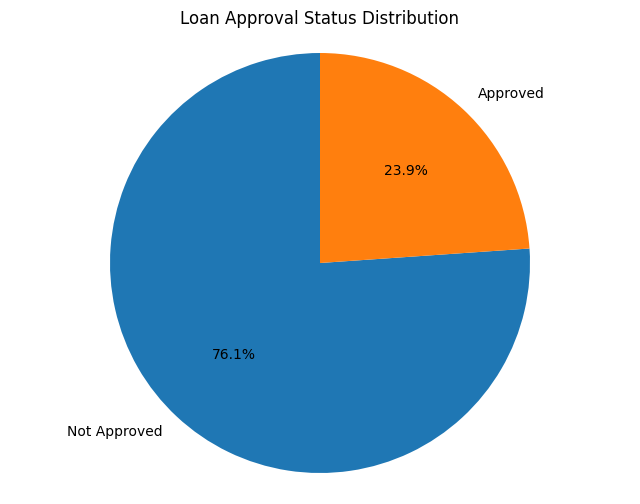

In [7]:
plt.figure(figsize=(8, 6))
plt.pie(count_approval, labels=['Not Approved', 'Approved'], autopct='%1.1f%%', startangle=90)
plt.title('Loan Approval Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

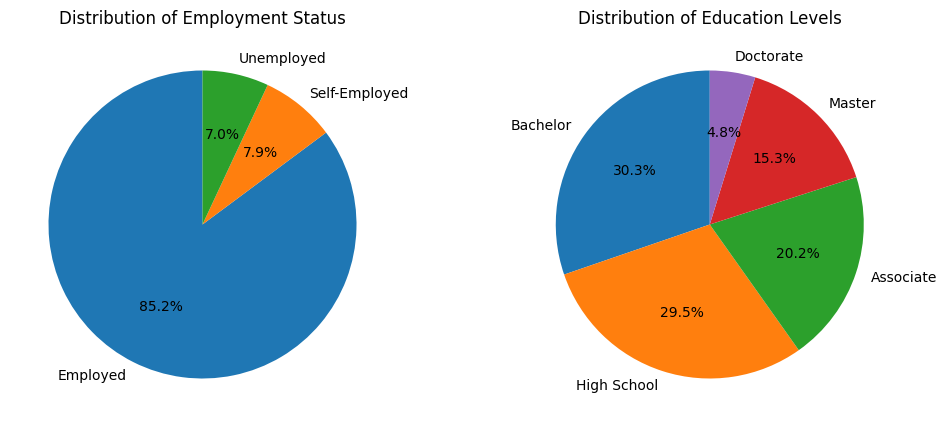

In [8]:
education_count=df['EducationLevel'].value_counts()
employment_counts =df['EmploymentStatus'].value_counts()

# Create a pie chart
fig,ax=plt.subplots(1,2)
fig.set_size_inches((12,5))
ax[0].pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribution of Employment Status')
ax[1].pie(education_count, labels=education_count.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Education Levels')


plt.show()

In [9]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [10]:
#Income distribution by employment status and education level.
df_employment=pd.DataFrame(df.groupby('EmploymentStatus')['AnnualIncome'].sum().sort_values(ascending=False))
df_education=pd.DataFrame(df.groupby('EducationLevel')['AnnualIncome'].sum().sort_values(ascending=False))
df_employment


,AnnualIncome
EmploymentStatus,
Employed,1003296758
Self-Employed,96148353
Unemployed,83784360


C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\4195700200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_employment,x='AnnualIncome',y='EmploymentStatus',ax=ax[0],palette='dark:salmon_r')
C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\4195700200.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\4195700200.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_education,x='AnnualIncome',y='EducationLevel',ax=ax[1],palette='dark:salmon_r')
C:\Users\Cornelius\A

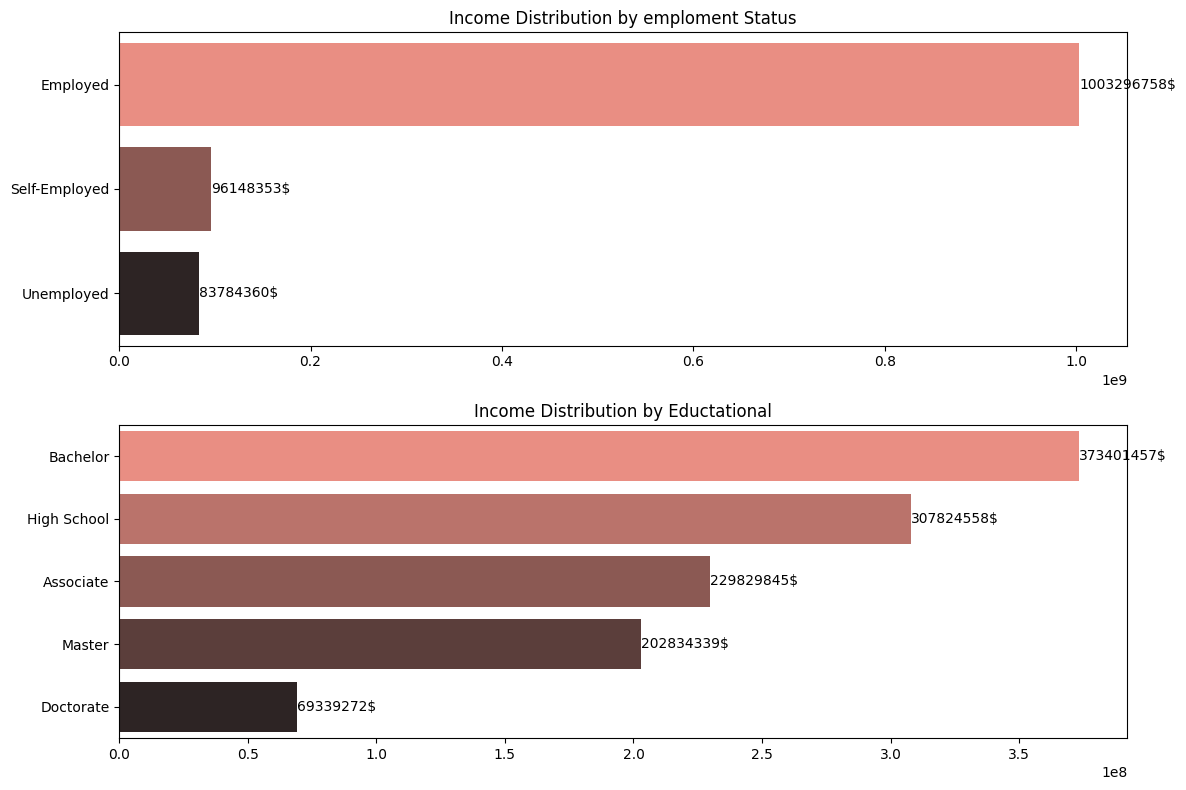

In [11]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(12,8)
sns.barplot(data=df_employment,x='AnnualIncome',y='EmploymentStatus',ax=ax[0],palette='dark:salmon_r')
ax[0].set_title('Income Distribution by emploment Status')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
for n,v in enumerate(df_employment['AnnualIncome']):
        ax[0].text(v + 1,n,f'{v:.0f}$',va='center')
sns.barplot(data=df_education,x='AnnualIncome',y='EducationLevel',ax=ax[1],palette='dark:salmon_r')
ax[1].set_title('Income Distribution by Eductational')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend().remove()
for n,v in enumerate(df_education['AnnualIncome']):
        ax[1].text(v + 1,n,f'{v:.0f}$',va='center')

plt.tight_layout()


In [12]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [13]:
df[df['LoanApproved']==0]

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
6,2018-01-07,58,51250,564,Employed,High School,39,12741,48,Married,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [14]:
df_employment_not_approved=pd.DataFrame(df[df['LoanApproved']==0].groupby('LoanApproved')['EmploymentStatus'].value_counts())
df_employment_not_approved
df_employment_loan_approved=pd.DataFrame(df[df['LoanApproved']==1].groupby('LoanApproved')['EmploymentStatus'].value_counts())



Text(35.347222222222214, 0.5, '')

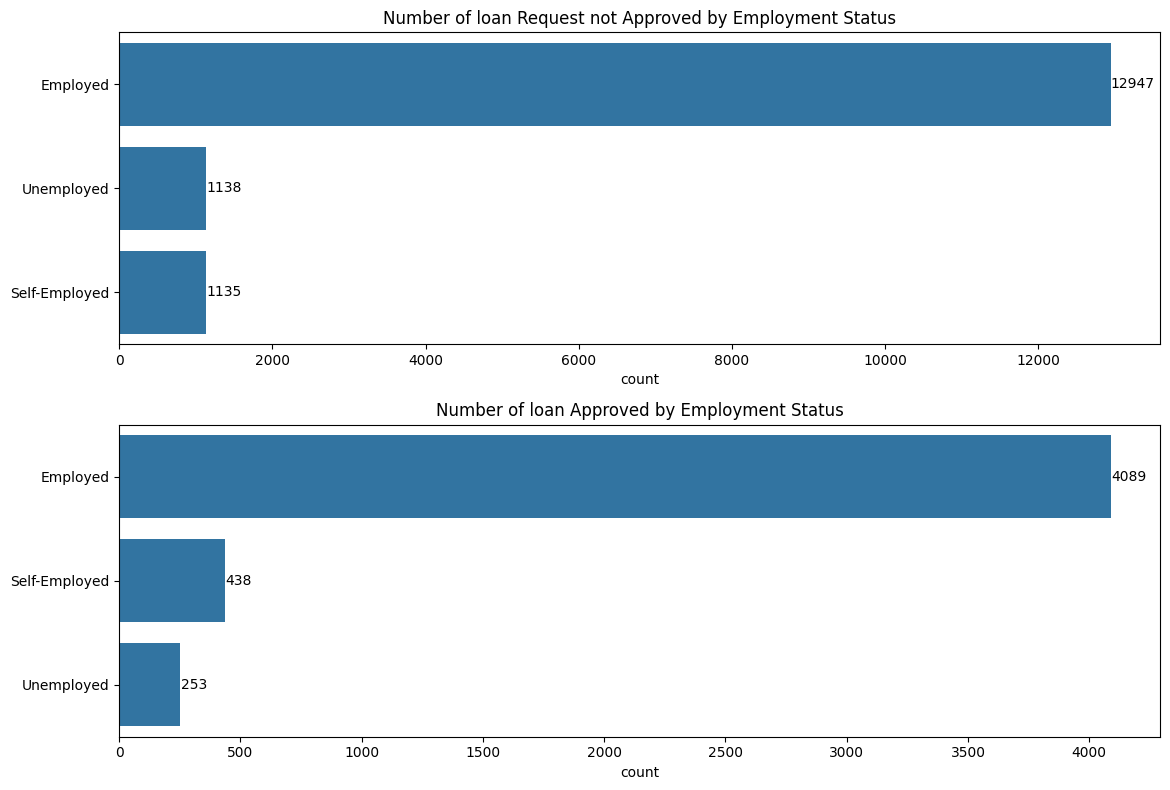

In [15]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(12,8)
sns.barplot(data=df_employment_not_approved,y='EmploymentStatus', x='count',ax=ax[0])
ax[0].set_title('Number of loan Request not Approved by Employment Status')
ax[1].set_title("Number of loan Approved by Employment Status")
ax[0]. set_ylabel('')
for n,v in enumerate(df_employment_not_approved['count']):
        ax[0].text(v + 1,n,f'{v:.0f}',va='center')
sns.barplot(data=df_employment_loan_approved,y='EmploymentStatus', x='count',ax=ax[1])
for n,v in enumerate(df_employment_loan_approved['count']):
        ax[1].text(v + 1,n,f'{v:.0f}',va='center')
plt.tight_layout()
ax[1]. set_ylabel('')

In [16]:
#distribution of Credit Scores

In [17]:
df['CreditScore']

0        617
1        628
2        570
3        545
4        594
        ... 
19995    587
19996    567
19997    645
19998    560
19999    574
Name: CreditScore, Length: 20000, dtype: int64

Text(0.5, 1.0, 'credit Score distribution')

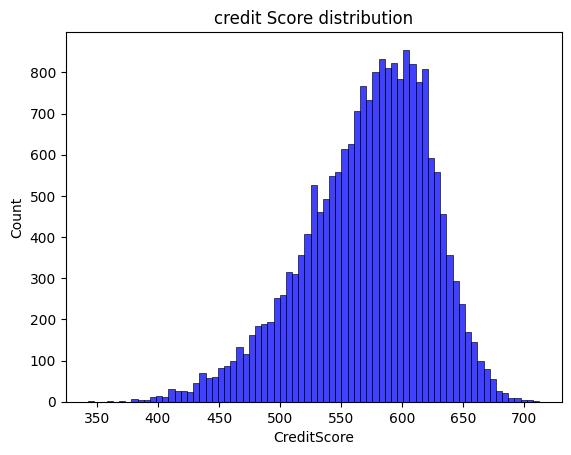

In [18]:
sns.histplot(df['CreditScore'],kde=False,fill=True,color="Blue")
plt.title('credit Score distribution')

In [19]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [20]:
employment_Approval=pd.DataFrame(df.groupby('EmploymentStatus')['LoanApproved'].mean().reset_index())
employment_Approval['Approval Rate']=employment_Approval['LoanApproved']*100

In [21]:
employment_Approval

,EmploymentStatus,LoanApproved,Approval Rate
0,Employed,0.240021,24.002113
1,Self-Employed,0.278449,27.844882
2,Unemployed,0.181884,18.188354


In [22]:
#Approval Rate for EducationLevel
Educationlevel_Approval=pd.DataFrame(df.groupby('EducationLevel')['LoanApproved'].mean().reset_index())
Educationlevel_Approval['Approval Rate']=Educationlevel_Approval['LoanApproved']*100
Educationlevel_Approval

,EducationLevel,LoanApproved,Approval Rate
0,Associate,0.204264,20.426376
1,Bachelor,0.266435,26.643541
2,Doctorate,0.440252,44.025157
3,High School,0.144381,14.438050
4,Master,0.350820,35.081967


In [23]:
# Calculate approval rates for Marital Status
Marital_Approval=pd.DataFrame(df.groupby('MaritalStatus')['LoanApproved'].mean().reset_index())
Marital_Approval['Approval Rate']=Marital_Approval['LoanApproved']*100
Marital_Approval

,MaritalStatus,LoanApproved,Approval Rate
0,Divorced,0.244969,24.496877
1,Married,0.238522,23.852206
2,Single,0.239388,23.938796
3,Widowed,0.224224,22.422422


C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\3853487705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employment_Approval,ax=ax[0],y='EmploymentStatus',x='LoanApproved',palette='dark:salmon_r')
C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\3853487705.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\3853487705.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\3853487705.py:9: UserWarning: No artists with label

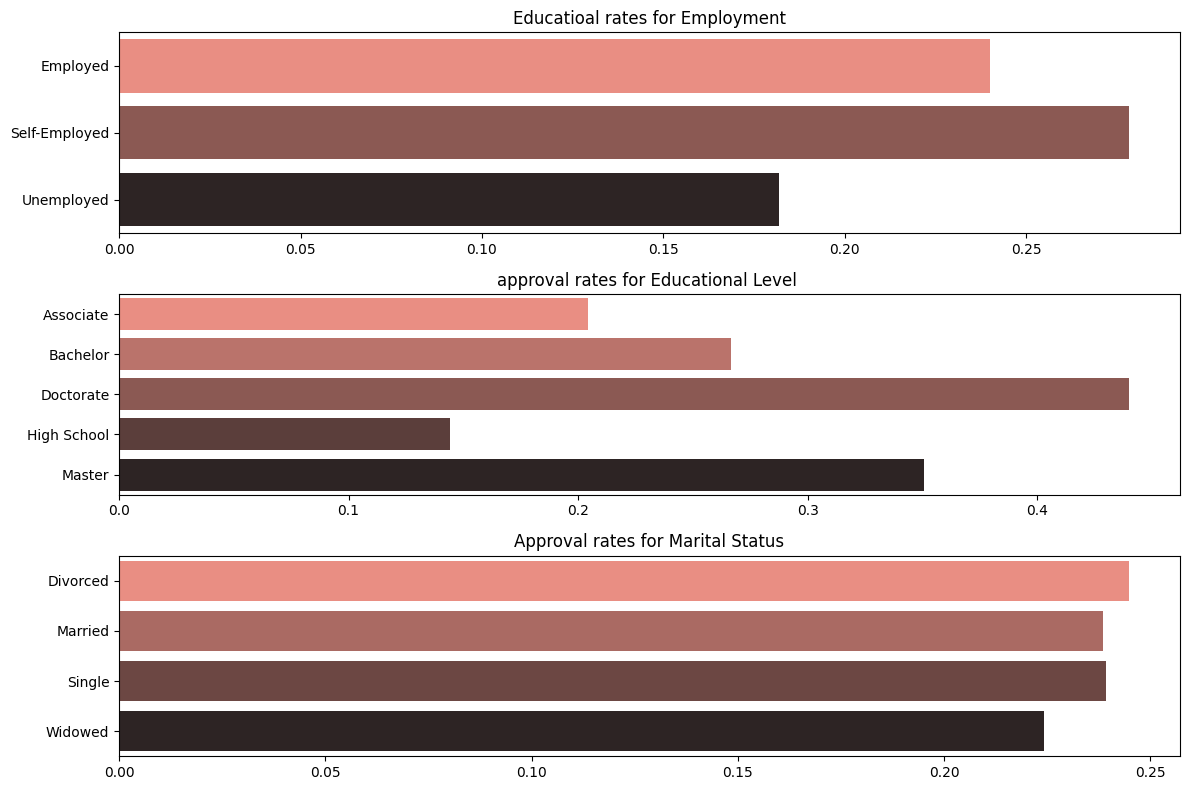

In [24]:
fig,ax=plt.subplots(3,1)
fig.set_size_inches(12,8)
sns.barplot(data=employment_Approval,ax=ax[0],y='EmploymentStatus',x='LoanApproved',palette='dark:salmon_r')
ax[0].legend().remove()
ax[0].set_title('Educatioal rates for Employment')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].legend().set_visible(False)
sns.barplot(data=Educationlevel_Approval,ax=ax[1],y='EducationLevel',x='LoanApproved',palette='dark:salmon_r')
ax[1].legend().remove()
ax[1].set_title('approval rates for Educational Level ')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].legend().remove()
ax[1].legend().set_visible(False)
sns.barplot(data=Marital_Approval,ax=ax[2],y='MaritalStatus',x='LoanApproved',palette='dark:salmon_r')
ax[2].legend().remove()
ax[2].set_title('Approval rates for Marital Status')
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].legend().remove()
ax[2].legend().set_visible(False)
plt.tight_layout()
    
    

In [25]:
# Loan Approval Rates by Credit Score Range

In [26]:
# Create bins for credit scores
bins = [300, 400, 500, 600, 700, 800]
labels = ['300-400', '401-500', '501-600', '601-700', '701-800']
df['CreditScoreRange']=pd.cut(df['CreditScore'],bins=bins, labels=labels)

In [27]:
Approval_rate= pd.DataFrame(df.groupby('CreditScoreRange')['LoanApproved'].mean()*100)
Approval_rate

C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\3864440748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Approval_rate= pd.DataFrame(df.groupby('CreditScoreRange')['LoanApproved'].mean()*100)


,LoanApproved
CreditScoreRange,
300-400,5.555556
401-500,15.129151
501-600,21.134109
601-700,31.653321
701-800,66.666667


C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\1956731514.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Approval_rate,x="CreditScoreRange",y='LoanApproved',palette='dark:salmon_r')


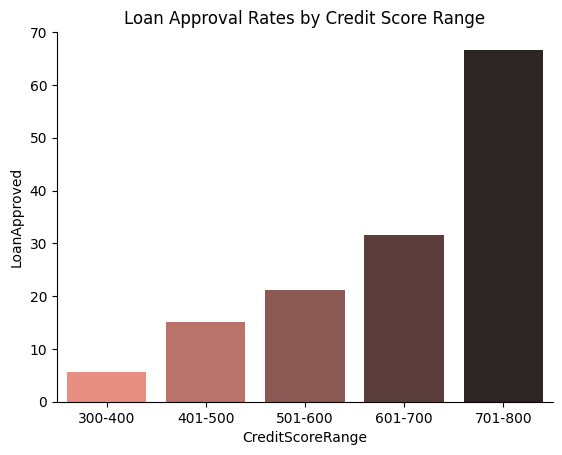

In [28]:
sns.barplot(Approval_rate,x="CreditScoreRange",y='LoanApproved',palette='dark:salmon_r')
plt.title('Loan Approval Rates by Credit Score Range')
sns.despine()

In [31]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,CreditScoreRange
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,601-700
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,601-700
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,501-600
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,501-600
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,501-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,501-600
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,501-600
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,601-700
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,501-600


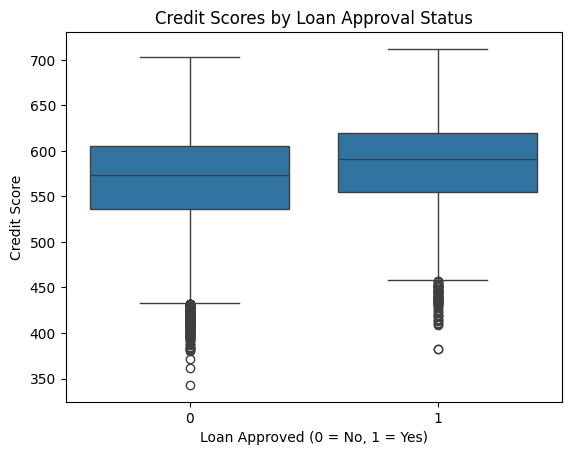

In [33]:
#Box Plot of Credit Scores by Loan Approval Status
sns.boxplot(data=df,y="CreditScore",x='LoanApproved')
plt.title('Credit Scores by Loan Approval Status')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Credit Score')
plt.show()

C:\Users\Cornelius\AppData\Local\Temp\ipykernel_1020\1595573565.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalDebtToIncomeRatio'],kde=True)


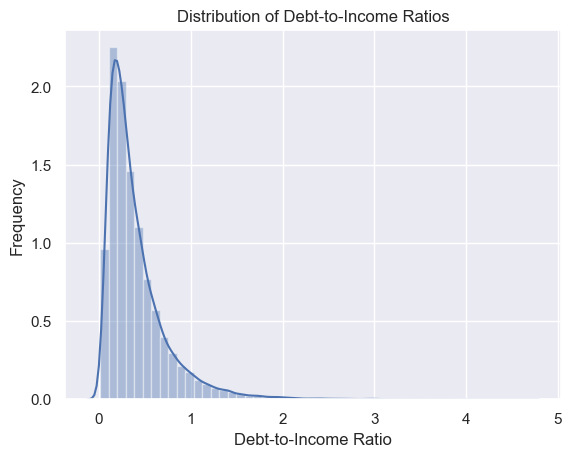

In [38]:
#distribution of Deb-to-income ratios among all applicants.
sns.set()
sns.distplot(df['TotalDebtToIncomeRatio'],kde=True)
plt.title('Distribution of Debt-to-Income Ratios')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


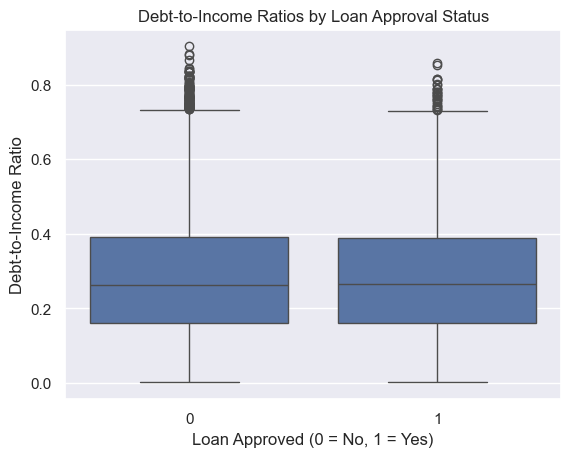

In [40]:
#Box Plot of debt to imcome Ratios by Loan Approval Status
sns.boxplot(data=df,x='LoanApproved',y='DebtToIncomeRatio',)
plt.title('Debt-to-Income Ratios by Loan Approval Status')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

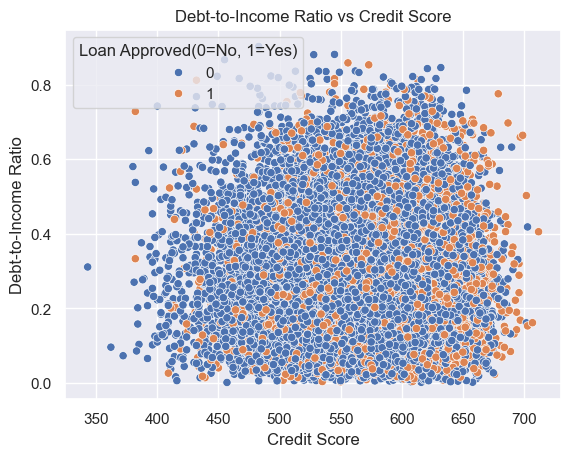

<Figure size 640x480 with 0 Axes>

In [54]:
#Scatter Plot of debt to imcome Ratio vs Credit Score
sns.scatterplot(data=df, x='CreditScore', y='DebtToIncomeRatio',hue='LoanApproved')
plt.title('Debt-to-Income Ratio vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio')
plt.legend(title='Loan Approved(0=No, 1=Yes)', loc='upper left')
plt.show()
plt.tight_layout()


In [56]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,CreditScoreRange
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,601-700
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,601-700
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,501-600
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,501-600
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,501-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,501-600
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,501-600
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,601-700
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,501-600


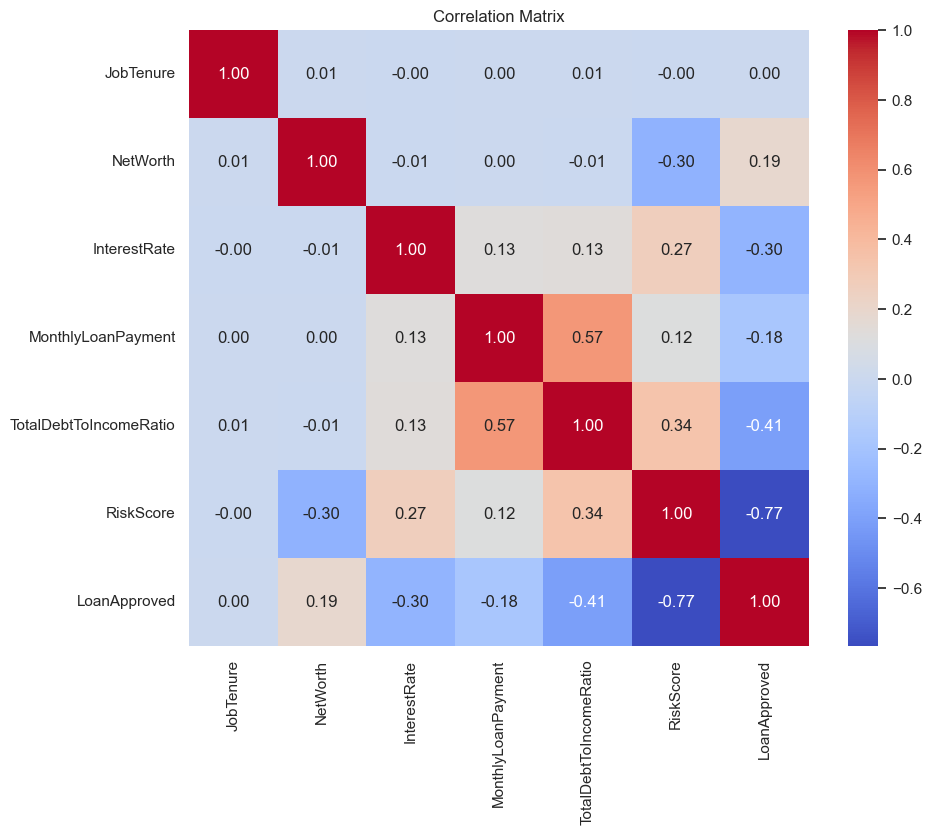

In [57]:
# Correlation Heatmap
#Show how various features, including DTI ratio, correlate with loan approval.
correlation_matrix = df[['JobTenure','NetWorth','InterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio','RiskScore','LoanApproved']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [58]:
#Conduct a t-test to determine if there is a statistically significant difference in DTI ratios between approved and not approved loans
approved_dti = df[df['LoanApproved'] == 1]['DebtToIncomeRatio']
not_approved_dti = df[df['LoanApproved'] == 0]['DebtToIncomeRatio']
print("Approved Loans - Mean DTI:", approved_dti.mean(), "Median DTI:", approved_dti.median())
print("Not Approved Loans - Mean DTI:", not_approved_dti.mean(), "Median DTI:", not_approved_dti.median())

Approved Loans - Mean DTI: 0.28574444355357376 Median DTI: 0.26660040715692995
Not Approved Loans - Mean DTI: 0.28573157273090943 Median DTI: 0.2631069509002969


In [59]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(approved_dti, not_approved_dti)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 0.004845181117942071, P-value: 0.9961341682462529


In [60]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,CreditScoreRange
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,601-700
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,601-700
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,501-600
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,501-600
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,501-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,501-600
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,501-600
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,601-700
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,501-600


In [67]:
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,CreditScoreRange
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,601-700
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,601-700
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,501-600
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,501-600
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,501-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,501-600
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,501-600
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,601-700
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,501-600


In [71]:
#Loan Approval Prediction:
# Convert categorical variables into dummy variables if necessary
df_encoded = pd.get_dummies(df, columns=['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus','LoanPurpose'], drop_first=True)

# Define features (X) and target variable (y)
X = df_encoded.drop(['LoanApproved', 'ApplicationDate','CreditScoreRange'], axis=1)  # Exclude target and non-numeric features
y = df_encoded['LoanApproved']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.99      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

